In [1]:
import keras
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [4]:
train_dir = 'data-mask-detection/Train'
test_dir = 'data-mask-detection/Test'
val_dir = 'data-mask-detection/Validation'

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [22]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

80150528/80134624 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [23]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [24]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

Epoch 1/20


<ipython-input-24-71cc3d49c955>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


9/9 [==============================] - 16s 2s/step - loss: 0.6250 - accuracy: 0.6458
Epoch 2/20
9/9 [==============================] - 17s 2s/step - loss: 0.3106 - accuracy: 0.8472
Epoch 3/20
9/9 [==============================] - 16s 2s/step - loss: 0.1873 - accuracy: 0.9444
Epoch 4/20
9/9 [==============================] - 17s 2s/step - loss: 0.1621 - accuracy: 0.9340
Epoch 5/20
9/9 [==============================] - 17s 2s/step - loss: 0.1064 - accuracy: 0.9688
Epoch 6/20
9/9 [==============================] - 17s 2s/step - loss: 0.1165 - accuracy: 0.9549
Epoch 7/20
9/9 [==============================] - 17s 2s/step - loss: 0.0905 - accuracy: 0.9653
Epoch 8/20
9/9 [==============================] - 17s 2s/step - loss: 0.1017 - accuracy: 0.9653
Epoch 9/20
9/9 [==============================] - 17s 2s/step - loss: 0.1256 - accuracy: 0.9514
Epoch 10/20
9/9 [==============================] - 17s 2s/step - loss: 0.0968 - accuracy: 0.9618
Epoch 11/20
9/9 [==============================] -

In [25]:
model.evaluate_generator(test_generator)

<ipython-input-25-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.062370363622903824, 0.9825000166893005]

In [44]:
model.metrics_names

['loss', 'accuracy']

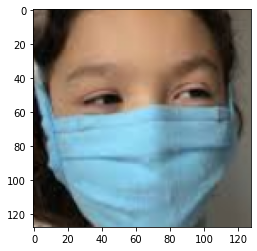

In [61]:
sample_mask_img = cv2.imread('data-mask-detection/Test/WithMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [62]:
model.predict(sample_mask_img)

array([[0.93086326, 0.06062874]], dtype=float32)

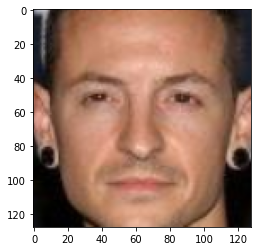

In [59]:
sample_mask_img = cv2.imread('data-mask-detection/Test/WithoutMask/45.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [60]:
model.predict(sample_mask_img)

array([[0.01335046, 0.9781626 ]], dtype=float32)

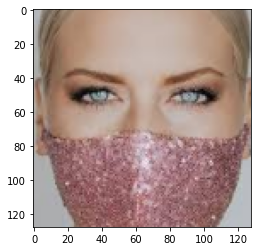

In [55]:
sample_mask_img = cv2.imread('data-mask-detection/Test/WithMask/45.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [56]:
model.predict(sample_mask_img)

array([[0.21993545, 0.7294247 ]], dtype=float32)

In [41]:
model.save('masknet.h5')

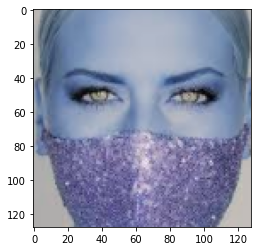

In [57]:
sample_mask_img = cv2.imread('data-mask-detection/Test/WithMask/45.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [58]:
model.predict(sample_mask_img)

array([[0.14985406, 0.79011214]], dtype=float32)

In [2]:
load_model = keras.models.load_model('masknet.h5')
labels_dict={0:'with mask',1:'without mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

size = 4
cv2.namedWindow("COVID Mask Detection Video Feed")
webcam = cv2.VideoCapture(0) 

classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    rval, im = webcam.read()
    im=cv2.flip(im,1,1)
    
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))
 
    faces = classifier.detectMultiScale(mini)

    for f in faces:
        (x, y, w, h) = [v * size for v in f] 
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(128,128))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,128,128,3))
        reshaped = np.vstack([reshaped])
        result=load_model.predict(reshaped)
        print(str(result) + " " + str(datetime.now()))
        if result[0][0] > result[0][1]:
            percent = round(result[0][0]*100,2)
        else:
            percent = round(result[0][1]*100,2)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label] + " " + str(percent) + "%", (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    if im is not None:   
        cv2.imshow('COVID Mask Detection Video Feed', im)
    key = cv2.waitKey(10)
    
    # Exit
    if key == 27: #The Esc key
        break
        
# Stop video
webcam.release()

[[0.37951624 0.6279255 ]] 2022-04-02 17:16:58.506046
[[0.48689508 0.54569787]] 2022-04-02 17:16:58.604694
[[0.74902856 0.37977505]] 2022-04-02 17:16:58.751979
[[0.78457433 0.32075006]] 2022-04-02 17:16:58.857525
[[0.8041425  0.27669385]] 2022-04-02 17:16:58.959140
[[0.73765033 0.32357323]] 2022-04-02 17:16:59.077614
[[0.7639384  0.31035185]] 2022-04-02 17:16:59.185010
[[0.71008   0.3474275]] 2022-04-02 17:16:59.287676
[[0.7076269  0.35291338]] 2022-04-02 17:16:59.418549
[[0.66238886 0.3439647 ]] 2022-04-02 17:16:59.508715
[[0.68892026 0.3309157 ]] 2022-04-02 17:16:59.606338
[[0.6330687  0.39155567]] 2022-04-02 17:16:59.724308
[[0.7576848  0.27468508]] 2022-04-02 17:16:59.813060
[[0.6666729  0.34910232]] 2022-04-02 17:16:59.908662
[[0.73095816 0.30365604]] 2022-04-02 17:17:00.010872
[[0.68067384 0.3531913 ]] 2022-04-02 17:17:00.106028
[[0.68049747 0.3612031 ]] 2022-04-02 17:17:00.202814
[[0.7345224  0.29665154]] 2022-04-02 17:17:00.304997
[[0.74155265 0.27083468]] 2022-04-02 17:17:00.41

[[0.89866906 0.08821851]] 2022-04-02 17:17:19.939055
[[0.8645675  0.11341149]] 2022-04-02 17:17:20.072420
[[0.87621045 0.1282388 ]] 2022-04-02 17:17:20.220036
[[0.9013964  0.13328329]] 2022-04-02 17:17:20.360564
[[0.90534544 0.12670255]] 2022-04-02 17:17:20.486779
[[0.8380489  0.19286749]] 2022-04-02 17:17:20.604817
[[0.7563027  0.17557356]] 2022-04-02 17:17:20.742554
[[0.30110735 0.7867847 ]] 2022-04-02 17:17:20.931956
[[0.1992414  0.84410244]] 2022-04-02 17:17:21.061595
[[0.24435702 0.81303835]] 2022-04-02 17:17:21.181478
[[0.24693981 0.8168154 ]] 2022-04-02 17:17:21.324515
[[0.25730845 0.81017053]] 2022-04-02 17:17:21.468720
[[0.20687687 0.8520587 ]] 2022-04-02 17:17:21.598753
[[0.21719182 0.8383584 ]] 2022-04-02 17:17:21.731806
[[0.18483531 0.8479883 ]] 2022-04-02 17:17:21.904031
[[0.19302139 0.82957995]] 2022-04-02 17:17:21.999734
[[0.1945875  0.83513474]] 2022-04-02 17:17:22.095735
[[0.17698103 0.8631903 ]] 2022-04-02 17:17:22.195751
[[0.18497005 0.85247993]] 2022-04-02 17:17:22.